# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

#Set input_depth to 3 for color, 1 to convert to greyscale
input_depth = 1

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('Done')

Done


In [2]:
#Convert Images to Grayscale

def convert_to_gray(rgb_data):
    gray = np.zeros((len(rgb_data),len(rgb_data[0]),len(rgb_data[0][0]),1))
    for i in range(0,len(rgb_data)):
            for j in range(0,len(rgb_data[0])):
                for k in range(0,len(rgb_data[0][0])):
                    R = rgb_data[i][j][k][0]
                    G = rgb_data[i][j][k][1]
                    B = rgb_data[i][j][k][2]
                    gray[i][j][k][0] = R*0.299 + G*0.587 + B*0.114  #Weighted average to convert to grayscale
    return gray


    

In [3]:
if input_depth == 1:
    print('Converting to Grayscale')
    X_train = convert_to_gray(X_train)
    X_test = convert_to_gray(X_test)
    X_valid = convert_to_gray(X_valid)
    print('Done')

Converting to Grayscale
Done


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
import csv
import random

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
#Get a rondom index
index = random.randint(0,n_train)
#Find the shape of the image at the random index
image_shape = X_train[index].shape

# TODO: How many unique classes/labels there are in the dataset.
with open('signnames.csv') as f:
    reader = csv.reader(f)
    next(reader)
    n_classes = max(int(row[0]) for row in reader)+1

print("Number of training examples =", n_train)
print("Number of validation examples = ", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of validation examples =  4410
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
#Display each type of sign

def extract_signs(images, labels):
    
    #Arrays to store the first instance of each sign type
    extracted_sign_images = np.zeros((43,32,32,input_depth),dtype = np.int) #store sign image
    extracted_sign_labels = np.negative(np.ones(43,dtype = np.int)) #store sign label
    
    #Set first sign to first element in array
    extracted_sign_labels[0] = labels[0]
    extracted_sign_images[0] = images[0]
    
    #Define counters
    current_ind = 1
    current_ind_found_signs = 1
    
    while extracted_sign_labels[42] == -1:
        if labels[current_ind] not in extracted_sign_labels:
            #A new sign has been found
            extracted_sign_labels[current_ind_found_signs] = labels[current_ind]
            extracted_sign_images[current_ind_found_signs] = images[current_ind]
            current_ind_found_signs = current_ind_found_signs + 1

        current_ind = current_ind + 1
    
    #Sort images and labels
    sorted_labels = list(range(0,43))
    sorted_images = np.zeros((43,32,32,input_depth),dtype = np.int)
    
    for k in range(0,43):
        sorted_images[k] = extracted_sign_images[list(extracted_sign_labels).index(k)]
        
    return sorted_images, sorted_labels
    
        

        
        
        

In [6]:

def plot_random():
    #Select a rondom image
    index = random.randint(0, n_train)
    image = X_train[index]

    plt.figure(figsize=(1,1))
    if input_depth == 1:
        image = image.reshape(32,32)
        plt.imshow(image, cmap = "gray")
    else:
        plt.imshow(image)



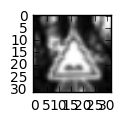

In [7]:
#Plot an example of a specifc sign
import matplotlib.pyplot as plt
%matplotlib inline

sign_to_display = 22

signs_to_plot, labels_to_plot = extract_signs(X_valid, y_valid)
image = signs_to_plot[sign_to_display]
plt.figure(figsize=(1,1))
if input_depth == 1:
    image = image.reshape(32,32)
    plt.imshow(image, cmap = "gray")
else:
    plt.imshow(image)

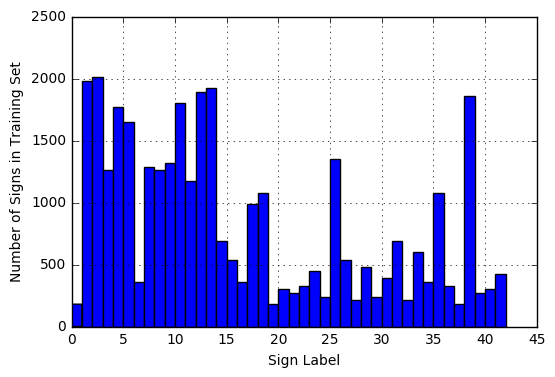

In [8]:
#Histogram of training set
n, bins, patches = plt.hist(y_train, 42)
plt.xlabel('Sign Label')
plt.ylabel('Number of Signs in Training Set')
plt.grid(True)

plt.show()

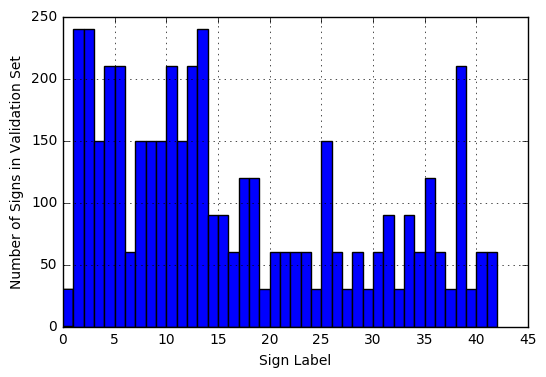

In [9]:
#Histogram of validation set
n, bins, patches = plt.hist(y_valid, 42)

plt.xlabel('Sign Label')
plt.ylabel('Number of Signs in Validation Set')
plt.grid(True)

plt.show()

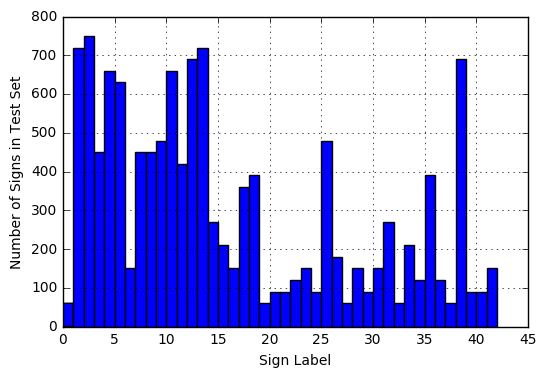

In [10]:
#Histogram of test set
n, bins, patches = plt.hist(y_test, 42)

plt.xlabel('Sign Label')
plt.ylabel('Number of Signs in Test Set')
plt.grid(True)

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [11]:
#Normalize the data
import numpy as np

def normalize(data):
    normalized_data = data
    for i in range(0,len(data)):
        for j in range(0,len(data[0])):
            for k in range(0,len(data[0][0])):
                for l in range(0,len(data[0][0][0])):
                    normalized_data[i][j][k][l] = (data[i][j][k][l]-128.0)/128.0
    return normalized_data

#Cast data as floats and normalize
print('Normalizing')
X_train_norm = normalize(np.float32(X_train))
X_test_norm = normalize(np.float32(X_test))
X_valid_norm = normalize(np.float32(X_valid))
print('Done')

Normalizing
Done


### Model Architecture

### Input
The LeNet architecture accepts a 32x32x3 image as input. 

### Architecture
**Layer 1: Convolutional.** Output Shape: 28x28x6.

**Activation.** Relu

**Pooling.** Output Shape: 14x14x6.

**Layer 2: Convolutional.** Output Shape: 10x10x16.

**Activation.** Relu

**Pooling.** Output Shape: 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.

**Layer 3: Fully Connected.** 120 outputs.

**Activation.** Relu

**Layer 4: Fully Connected.** 84 outputs.

**Activation.** Relu

**Layer 5: Fully Connected (Logits).** 43 outputs.

In [12]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf

# Hyper Parameters
EPOCHS = 10
BATCH_SIZE = 128

rate = 0.0005 #Learning rate
keep_prob_value = .5 #Set Probablility to keep units

#Architecture dimensions
#Layer 1
depth_layer_1 = 43
patch_1 = 5

#Layer 2
depth_layer_2 = 129
patch_2 = 5

#Flatten sizes
layer_1_out_size = int((32-patch_1+1)/2)#Size of layer 1 after convolution and max pooling
flat_1_size = int((layer_1_out_size**2)*depth_layer_1)
layer_2_out_size = int((layer_1_out_size-patch_2+1)/2)#Size of layer 2 after convolution and max pooling            
flat_2_size = int((layer_2_out_size**2)*depth_layer_2)
flat_size = int(flat_1_size + flat_2_size)    

#Fully connected layer 1 output size
full_connect_1_size = 120

#Fully connected layer 2 output size
full_connect_2_size = 0
               
number_trainable_parameters = (input_depth*patch_1**2+1)*depth_layer_1+(depth_layer_1*patch_2**2+1)*depth_layer_2+(flat_size+1)*full_connect_1_size+(full_connect_1_size+1)*43
print("Number of trainable parameters =", number_trainable_parameters)            

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. 
    W1 = tf.Variable(tf.truncated_normal(shape=[patch_1,patch_1,input_depth,depth_layer_1],mean=mu,stddev=sigma))
    B1 = tf.Variable(tf.zeros(depth_layer_1))
    conv1 = tf.nn.conv2d(x,W1,[1,1,1,1],padding = 'VALID')
    conv1 = tf.nn.bias_add(conv1,B1)
    
    # TODO: Activation.
    act1 = tf.nn.relu(conv1)
    
    # TODO: Pooling. 
    m_pad_1 = tf.nn.max_pool(act1,ksize=[1,2,2,1],strides = [1,2,2,1], padding = 'SAME')
    
    # TODO: Layer 2: Convolutional. 
    W2 = tf.Variable(tf.truncated_normal(shape=[patch_2,patch_2,depth_layer_1,depth_layer_2],mean=mu,stddev=sigma))
    B2 = tf.Variable(tf.zeros(depth_layer_2))
    conv2 = tf.nn.conv2d(m_pad_1,W2,[1,1,1,1],padding = 'VALID')
    conv2 = tf.nn.bias_add(conv2,B2)
    
    # TODO: Activation.
    act2 = tf.nn.relu(conv2)
    
    # TODO: Pooling. 
    m_pad_2 = tf.nn.max_pool(act2,ksize=[1,2,2,1],strides = [1,2,2,1], padding = 'SAME')
    
    #Flatten
    #Flatten Convolution Layer 1. 
    flat_1 = flatten(m_pad_1)
        
    #Flatten Convolution Layer 2. 
    flat_2 = flatten(m_pad_2)

    #Combine 1st and 2nd stage for the classifier
    flat = tf.concat(1, values = [flat_1, flat_2])
    
    # TODO: Layer 3: Fully Connected. 
    W3 = tf.Variable(tf.truncated_normal(shape=(flat_size,full_connect_1_size),mean=mu,stddev=sigma))
    B3 = tf.Variable(tf.zeros(full_connect_1_size))
    fc1 = tf.add(tf.matmul(flat, W3), B3)
    
    # TODO: Activation.
    act3 = tf.nn.relu(fc1)
    act3 = tf.nn.dropout(act3, keep_prob)

    # TODO: Layer 4: Fully Connected. 
    W4 = tf.Variable(tf.truncated_normal(shape=(full_connect_1_size,43),mean=mu,stddev=sigma))
    B4 = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(act3, W4), B4)
    
    # TODO: Activation.
    #act4 = tf.nn.relu(fc2)
    #act4 = tf.nn.dropout(act4, keep_prob)
    
    # TODO: Layer 5: Fully Connected. 
    #W5 = tf.Variable(tf.truncated_normal(shape=(full_connect_2_size,43),mean=mu,stddev=sigma))
    #B5 = tf.Variable(tf.zeros(43))
    #logits = tf.add(tf.matmul(act4, W5), B5)
    
    return logits

Number of trainable parameters = 1543605


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
# Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, input_depth))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32) # probability to keep units

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
print('Done')

Done


In [14]:
# Evaluate the Model

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
print('Done')

Done


In [15]:
# Train the model
from sklearn.utils import shuffle

model_path = './traffic_sign_classifier_best_acc.ckpt'

#Initialize validation accuracy
validation_accuracy_best = 0.0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_value})
            
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        if validation_accuracy_best < validation_accuracy:
            validation_accuracy_best = validation_accuracy
            
            #Save the model with the highest accuracy
            saver.save(sess, model_path)
            print("Peak accuracy improved and Model Saved")
            print()
        else:
            print()
            


    print("Training Complete")
    print("Peak Validation Accuracy = {:.3f}".format(validation_accuracy_best))

Training...

EPOCH 1 ...
Validation Accuracy = 0.682
Peak accuracy improved and Model Saved

EPOCH 2 ...
Validation Accuracy = 0.852
Peak accuracy improved and Model Saved

EPOCH 3 ...
Validation Accuracy = 0.884
Peak accuracy improved and Model Saved

EPOCH 4 ...
Validation Accuracy = 0.915
Peak accuracy improved and Model Saved

EPOCH 5 ...
Validation Accuracy = 0.932
Peak accuracy improved and Model Saved

EPOCH 6 ...
Validation Accuracy = 0.932

EPOCH 7 ...
Validation Accuracy = 0.929

EPOCH 8 ...
Validation Accuracy = 0.934
Peak accuracy improved and Model Saved

EPOCH 9 ...
Validation Accuracy = 0.934

EPOCH 10 ...
Validation Accuracy = 0.943
Peak accuracy improved and Model Saved

Training Complete
Peak Validation Accuracy = 0.943


In [16]:
    total_parameters = 0
    for variable in tf.trainable_variables():
        # shape is an array of tf.Dimension
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        total_parameters += variable_parameters
    print('Total Parameters: ',total_parameters)

1075
43
138675
129
1398360
120
5160
43
1543605


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

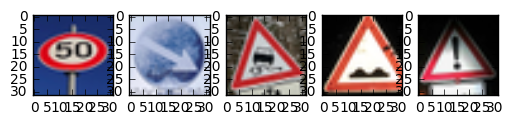

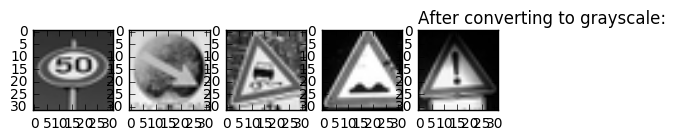

In [17]:
import matplotlib.image as mpimg
from PIL import Image

### Load Images and resize images

img1=Image.open('./traffic_signs/sign_1.jpg')
img1.thumbnail((32, 32), Image.ANTIALIAS) 
img1 = np.asarray(img1)

img2=Image.open('./traffic_signs/sign_2.jpg')
img2.thumbnail((32, 32), Image.ANTIALIAS) 
img2 = np.asarray(img2)

img3=Image.open('./traffic_signs/sign_3.jpg')
img3.thumbnail((32, 32), Image.ANTIALIAS) 
img3 = np.asarray(img3)

img4=Image.open('./traffic_signs/sign_4.jpg')
img4.thumbnail((32, 32), Image.ANTIALIAS) 
img4 = np.asarray(img4)

img5=Image.open('./traffic_signs/sign_5.jpg')
img5.thumbnail((32, 32), Image.ANTIALIAS) 
img5 = np.asarray(img5)

images = np.array([img1,img2,img3,img4,img5])
image_labels = np.array([2,38,23,22,18])

###Plot Color Images
fig1 = plt.figure()

for x in range(5):
    a=fig1.add_subplot(1,5,(x+1))
    imgplot = plt.imshow(images[x])

###Convert to Grayscale
gray_images = convert_to_gray(images)

###Plot Grayscale
fig2 = plt.figure()

for x in range(5):
    b=fig2.add_subplot(1,5,(x+1))
    imgplot = plt.imshow(gray_images[x].squeeze(), cmap = "gray")

b.set_title('After converting to grayscale:',loc = 'left')   

### Predict the Sign Type for Each Image

In [19]:
import tensorflow as tf

k = tf.placeholder(tf.float32, (None, 32, 32, input_depth))

#Normalize images
gray_images_norm = normalize(np.float32(gray_images))

print('Predicting...')
logits = LeNet(k)
softmax_5_images = tf.nn.softmax(logits=logits)
prediction=tf.argmax(softmax_5_images,1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, model_path)
    predicted_labels = sess.run(prediction, feed_dict={k: gray_images_norm, keep_prob: 1.0})
    #print(softmax_5_imagesllk)
    #top_5 = sess.run(tf.nn.top_k(tf.constant(softmax_5_images), k=5))

print(predicted_labels)

Predicting...
[20 39  1 39 39]


### Analyze Performance

In [20]:
### Calculate the accuracy for these 5 new images. 
num_correct = 0.0
for i in range(0,5):
    if predicted_labels[i] == image_labels[i]:
        num_correct = num_correct + 1
accuracy = 100*num_correct/5.0
print('The accuracy is: ', accuracy, '%')

The accuracy is:  0.0 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

for i in range(0,5):
    print('For image ',i+1,' which is a sign of type',image_labels[i],' the top 5 softmax probabilities are:')
    print(top_5['values'][i][0],' ',top_5['values'][i][1],' ',top_5['values'][i][2],' ',top_5['values'][i][3],' ',top_5['values'][i][4],' ')
    print()

# Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

The goals / steps of this project are the following:

*Load the data set (see below for links to the project data set)
*Explore, summarize and visualize the data set
*Design, train and test a model architecture
*Use the model to make predictions on new images
*Analyze the softmax probabilities of the new images
*Summarize the results with a written report

## Rubric

Here I will consider the rubric points individually and describe how I addressed each point in my implementation.

### Project Code

Available here

### Data Set Summary & Exploration

####1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I used python to calculate summary statistics of the traffic signs data set:

Number of training examples = 34799
Number of validation examples =  4410
Number of testing examples = 12630
Image data shape = (32, 32, 1) (The 'depth' of the image is 1 because I converted the images to grayscale)
Number of classes = 43

####2. Include an exploratory visualization of the dataset.

The following three bar charts plot the quantity of each sign type in the training set, the validation set and the test set, respectively.

INSERT BAR CHARTS

Although the distribution of signs betweeen the three sets is roughly the same, the number of signs of each type is very different within each data set. For example, in the trainign set, there are X examples of sign Y, while there are only K examples of sign L.

###Design and Test a Model Architecture

####1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

To kickstart this project, I reviewed two papers by authors that had previously achieved the highest scores on the traffic sign calssification competiton. The first is 'Traffic Sign Recognition with Multi-Scale Convolutional Networks' by Yann LeCunn and Pierre Sermanet [1]. The second is 'Multi-Column Deep Neural Network for Traffic Sign Classification' by Dan Ciresan, Ueli Meier, Jonathan Masci and Jugen Schmidhuber [2]. While [2] used color images achieved the highest accuracy of 99.46%, it's architecture took 37 hours to train on 4 GPUs. Since I wanted to move faster in my explorations, I chose to explore a similar architecture to [1] which trains much faster. In [1] the found that greyscale images produced better results than color images and so I opted to first convert my images to greyscale. 

Here is an example of an image before and after converting to grayscale:






I normalized the image data because...




####2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

My final model consisted of the following layers:

Layer	Description
Input	32x32x3 RGB image
Convolution 3x3	1x1 stride, same padding, outputs 32x32x64
RELU	
Max pooling	2x2 stride, outputs 16x16x64
Convolution 3x3	etc.
Fully connected	etc.
Softmax	etc.

####3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

To train the model, I used an ....

####4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

My final model results were:

training set accuracy of ?
validation set accuracy of ?
test set accuracy of ?
If an iterative approach was chosen:

Using the LeNet architecture that was supplied as a starting point for this lab, I wanted to get a quick sense for how changing the hyper parameters affects the accuracy of the network. 

The baseline network I used is as follows:

<img src="images/baseline_architecture.png">

I then made the following changes to this network, each time ensuring that only one hyper parameter was changed. This produced the following results:

<img src="images/network_changes.png">

Of particular note is:

I drew the following conclusions and used this to further refine the network and hyper parameters:

INSERT conclusions

What was the first architecture that was tried and why was it chosen?
What were some problems with the initial architecture?
How was the architecture adjusted and why was it adjusted? Typical adjustments could include choosing a different model architecture, adding or taking away layers (pooling, dropout, convolution, etc), using an activation function or changing the activation function. One common justification for adjusting an architecture would be due to overfitting or underfitting. A high accuracy on the training set but low accuracy on the validation set indicates over fitting; a low accuracy on both sets indicates under fitting.
Which parameters were tuned? How were they adjusted and why?
What are some of the important design choices and why were they chosen? For example, why might a convolution layer work well with this problem? How might a dropout layer help with creating a successful model?
If a well known architecture was chosen:

What architecture was chosen?
Why did you believe it would be relevant to the traffic sign application?
How does the final model's accuracy on the training, validation and test set provide evidence that the model is working well?

###Test a Model on New Images

####1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are five German traffic signs that I found on the web:

alt text alt text alt text alt text alt text

The first image might be difficult to classify because ...

####2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the prediction:

Image	Prediction
Stop Sign	Stop sign
U-turn	U-turn
Yield	Yield
100 km/h	Bumpy Road
Slippery Road	Slippery Road
The model was able to correctly guess 4 of the 5 traffic signs, which gives an accuracy of 80%. This compares favorably to the accuracy on the test set of ...

####3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

The code for making predictions on my final model is located in the 11th cell of the Ipython notebook.

For the first image, the model is relatively sure that this is a stop sign (probability of 0.6), and the image does contain a stop sign. The top five soft max probabilities were

Probability	Prediction
.60	Stop sign
.20	U-turn
.05	Yield
.04	Bumpy Road
.01	Slippery Road
For the second image ...

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")